# Import Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,8)
plt.rcParams["figure.autolayout"] = True
import warnings
warnings.filterwarnings('ignore')

# Data Importing and Cleaning

In [13]:
df_loan=pd.read_csv('Data_Train.csv')
test=pd.read_csv('Data_Test.csv')
df_loan.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [14]:
test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [15]:
df_loan.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

In [16]:
df_loan.shape

(87500, 29)

In [17]:
test.shape

(37500, 28)

In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             87500 non-null  int64  
 1   GGGrade              87500 non-null  object 
 2   Experience           87500 non-null  object 
 3   Validation           87500 non-null  object 
 4   Yearly Income        81925 non-null  float64
 5   Home Status          87500 non-null  object 
 6   Unpaid 2 years       87500 non-null  int64  
 7   Already Defaulted    87500 non-null  int64  
 8   Designation          86086 non-null  object 
 9   Debt to Income       84011 non-null  float64
 10  Postal Code          86111 non-null  float64
 11  Lend Amount          87500 non-null  float64
 12  Deprecatory Records  87500 non-null  int64  
 13  Interest Charged     87500 non-null  float64
 14  Usage Rate           87500 non-null  float64
 15  Inquiries            87500 non-null 

In [19]:
df_loan.isnull().sum()

Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Asst_Reg             37500 non-null  int64  
 1   GGGrade              37500 non-null  object 
 2   Experience           37500 non-null  object 
 3   Validation           37500 non-null  object 
 4   Yearly Income        35075 non-null  float64
 5   Home Status          37500 non-null  object 
 6   Unpaid 2 years       37500 non-null  int64  
 7   Already Defaulted    37500 non-null  int64  
 8   Designation          36914 non-null  object 
 9   Debt to Income       35989 non-null  float64
 10  Postal Code          36889 non-null  float64
 11  Lend Amount          37500 non-null  float64
 12  Deprecatory Records  37500 non-null  int64  
 13  Interest Charged     37500 non-null  float64
 14  Usage Rate           37500 non-null  float64
 15  Inquiries            37500 non-null 

In [21]:
df_loan.describe()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [22]:
test.describe()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,3.750000e+04,3.507500e+04,37500.000000,37500.000000,35989.00000,36889.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.568600e+04,3.543100e+04,37500.000000
mean,3.804858e+06,1.340308e+05,0.336427,0.005307,30.91903,51233.945078,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.344820e+04,2.928066e+04,0.309792
std,2.284115e+06,1.000845e+05,0.887640,0.077966,13.87167,31250.428604,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.215483e+04,3.560849e+04,3.396315
min,3.752200e+04,8.800000e+03,0.000000,0.000000,0.00000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,1.495828e+06,8.419400e+04,0.000000,0.000000,20.47920,22900.000000,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.324000e+04,1.141425e+04,0.000000
50%,4.134010e+06,1.144000e+05,0.000000,0.000000,30.18960,47800.000000,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,5.934898e+06,1.584000e+05,0.000000,0.000000,40.72320,80200.000000,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.640000e+04,3.618446e+04,0.000000
max,7.351969e+06,8.800000e+06,18.000000,3.000000,116.50800,99900.000000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


In [23]:
df_loan.corr()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
Asst_Reg,1.000000,0.035298,0.034842,0.011144,0.088523,-0.014156,0.035463,0.060083,-0.003918,-0.074356,-0.109052,0.010265,-0.111597,-0.027765,0.055217,0.059253,0.031855,-0.064833,-0.413534
Yearly Income,0.035298,1.000000,0.048105,0.015212,-0.217565,-0.003886,0.379753,-0.006023,0.000878,0.046539,0.042901,0.480756,0.011979,-0.087292,0.147274,0.342919,0.346428,0.010316,-0.002872
Unpaid 2 years,0.034842,0.048105,1.000000,0.139225,-0.017023,-0.030558,-0.012538,-0.013911,0.000769,-0.018248,0.032898,0.064146,0.000142,0.058871,0.044931,-0.048703,-0.034495,0.020816,-0.030021
Already Defaulted,0.011144,0.015212,0.139225,1.000000,0.000945,-0.008595,0.000148,0.000338,-0.002908,-0.031001,-0.003279,0.020608,-0.000966,0.029875,0.015250,0.009123,0.001204,0.011485,-0.008235
Debt to Income,0.088523,-0.217565,-0.017023,0.000945,1.000000,0.004370,0.032461,-0.051685,-0.002211,0.162391,-0.004063,-0.009076,0.008508,0.175669,0.292328,0.084394,0.138476,-0.000393,-0.090758
Postal Code,-0.014156,-0.003886,-0.030558,-0.008595,0.004370,1.000000,-0.005100,-0.008839,0.001059,0.013406,0.007374,-0.008646,0.009521,-0.006331,-0.050865,-0.034395,-0.025425,-0.005567,0.032574
Lend Amount,0.035463,0.379753,-0.012538,0.000148,0.032461,-0.005100,1.000000,-0.080907,-0.002999,0.115829,-0.030195,0.323443,0.070179,0.144200,0.180107,0.356740,0.343999,0.036821,-0.059486
Deprecatory Records,0.060083,-0.006023,-0.013911,0.000338,-0.051685,-0.008839,-0.080907,1.000000,0.002984,-0.080653,0.072078,-0.065633,-0.010535,0.051904,-0.024598,-0.116259,-0.095573,-0.005655,-0.021013
Interest Charged,-0.003918,0.000878,0.000769,-0.002908,-0.002211,0.001059,-0.002999,0.002984,1.000000,-0.000879,-0.001635,-0.003021,-0.003095,-0.005658,0.001527,0.005934,0.003211,-0.001339,0.005988
Usage Rate,-0.074356,0.046539,-0.018248,-0.031001,0.162391,0.013406,0.115829,-0.080653,-0.000879,1.000000,-0.089634,0.080913,0.026460,0.229003,-0.157274,-0.132994,0.222095,0.024016,-0.032828


In [24]:
test.corr()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
Asst_Reg,1.000000,0.043117,0.034246,0.012868,0.085907,-0.024726,0.042227,0.052873,0.003846,-0.078626,-0.109384,0.015676,-0.119125,-0.031862,0.057438,0.063714,0.032341,-0.064003
Yearly Income,0.043117,1.000000,0.062557,0.017535,-0.209024,-0.010515,0.369441,0.004844,0.004585,0.023107,0.037544,0.461472,0.003552,-0.091497,0.142407,0.343496,0.331762,0.027977
Unpaid 2 years,0.034246,0.062557,1.000000,0.136429,-0.010603,-0.027920,0.002327,-0.011908,0.001358,-0.011257,0.043779,0.070740,0.000079,0.069201,0.047506,-0.049647,-0.035078,0.019985
Already Defaulted,0.012868,0.017535,0.136429,1.000000,0.011944,-0.000885,0.004985,0.014082,0.002501,-0.036424,0.002961,0.025586,0.002665,0.037930,0.020113,0.005098,-0.007736,0.005076
Debt to Income,0.085907,-0.209024,-0.010603,0.011944,1.000000,0.001058,0.027398,-0.069051,0.002219,0.165505,0.000564,-0.007769,0.010706,0.174070,0.288778,0.085257,0.143183,0.000674
Postal Code,-0.024726,-0.010515,-0.027920,-0.000885,0.001058,1.000000,-0.005578,-0.013463,-0.003136,0.013648,0.003933,-0.001268,-0.000322,-0.012529,-0.049425,-0.027845,-0.021995,-0.010120
Lend Amount,0.042227,0.369441,0.002327,0.004985,0.027398,-0.005578,1.000000,-0.088464,0.007249,0.116066,-0.033422,0.323766,0.076251,0.137817,0.182962,0.366039,0.354915,0.036609
Deprecatory Records,0.052873,0.004844,-0.011908,0.014082,-0.069051,-0.013463,-0.088464,1.000000,0.013152,-0.091704,0.067664,-0.070329,-0.011253,0.059489,-0.037136,-0.122783,-0.116623,-0.004545
Interest Charged,0.003846,0.004585,0.001358,0.002501,0.002219,-0.003136,0.007249,0.013152,1.000000,-0.004478,-0.005799,0.011153,0.001640,0.003845,0.008306,-0.002513,-0.006085,0.007992
Usage Rate,-0.078626,0.023107,-0.011257,-0.036424,0.165505,0.013648,0.116066,-0.091704,-0.004478,1.000000,-0.084731,0.078703,0.031660,0.236122,-0.160866,-0.145510,0.227827,0.034834


In [25]:
df_loan['Home Status']=df_loan['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT'})
df_loan['Home Status'].replace({'NONE':'MORTGAGE','OTHER':'MORTGAGE'},inplace=True)

In [26]:
test['Home Status']=test['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT'})
test['Home Status'].replace({'NONE':'MORTGAGE','OTHER':'MORTGAGE'},inplace=True)

In [27]:
df_loan['Home Status'].value_counts()

MORTGAGE    44170
RENT        34914
OWN          8416
Name: Home Status, dtype: int64

In [28]:
test['Home Status'].value_counts()

MORTGAGE    18916
RENT        14992
OWN          3592
Name: Home Status, dtype: int64

In [29]:
df_loan['Unpaid Amount'].fillna(df_loan['Unpaid Amount'].median(), inplace=True)
df_loan['Total Unpaid CL'].fillna(df_loan['Total Unpaid CL'].median(), inplace=True)
df_loan['Yearly Income'].fillna(df_loan['Yearly Income'].median(), inplace=True)
df_loan['Debt to Income'].fillna(df_loan['Debt to Income'].median(), inplace=True)
df_loan['Designation'].fillna(df_loan['Designation'].mode()[0], inplace=True)


test['Unpaid Amount'].fillna(test['Unpaid Amount'].median(), inplace=True)
test['Total Unpaid CL'].fillna(test['Total Unpaid CL'].median(), inplace=True)
test['Yearly Income'].fillna(test['Yearly Income'].median(), inplace=True)
test['Debt to Income'].fillna(test['Debt to Income'].median(), inplace=True)
test['Designation'].fillna(test['Designation'].mode()[0], inplace=True)

In [30]:
pd.DataFrame(data=zip(df_loan.isnull().sum(),np.round(df_loan.isnull().sum()/len(df_loan)*100,2)),
             index=df_loan.columns,columns=['Missing value counts','Percent missing values'])

,Missing value counts,Percent missing values
Asst_Reg,0,0.00
GGGrade,0,0.00
Experience,0,0.00
Validation,0,0.00
Yearly Income,0,0.00
Home Status,0,0.00
Unpaid 2 years,0,0.00
Already Defaulted,0,0.00
Designation,0,0.00
Debt to Income,0,0.00


In [31]:
pd.DataFrame(data=zip(test.isnull().sum(),np.round(test.isnull().sum()/len(test)*100,2)),
             index=test.columns,columns=['Missing value counts','Percent missing values'])

,Missing value counts,Percent missing values
Asst_Reg,0,0.00
GGGrade,0,0.00
Experience,0,0.00
Validation,0,0.00
Yearly Income,0,0.00
Home Status,0,0.00
Unpaid 2 years,0,0.00
Already Defaulted,0,0.00
Designation,0,0.00
Debt to Income,0,0.00


In [32]:
df_num=df_loan.select_dtypes(np.number)
test_num=test.select_dtypes(np.number)

In [33]:
df_num.drop(['Loan/No Loan','Postal Code'],axis=1,inplace=True)
test_num.drop(['Postal Code'],axis=1,inplace=True)

In [34]:
df_num.corr()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
Asst_Reg,1.000000,0.034119,0.034842,0.011144,0.086785,0.035463,0.060083,-0.003918,-0.074356,-0.109052,0.010265,-0.111597,-0.027765,0.055217,0.057734,0.031170,-0.064833
Yearly Income,0.034119,1.000000,0.046357,0.014610,-0.200150,0.367188,-0.005755,0.000820,0.044918,0.041710,0.464332,0.010664,-0.084393,0.142658,0.319536,0.328360,0.010000
Unpaid 2 years,0.034842,0.046357,1.000000,0.139225,-0.016661,-0.012538,-0.013911,0.000769,-0.018248,0.032898,0.064146,0.000142,0.058871,0.044931,-0.047520,-0.033590,0.020816
Already Defaulted,0.011144,0.014610,0.139225,1.000000,0.000938,0.000148,0.000338,-0.002908,-0.031001,-0.003279,0.020608,-0.000966,0.029875,0.015250,0.008956,0.000962,0.011485
Debt to Income,0.086785,-0.200150,-0.016661,0.000938,1.000000,0.031789,-0.050841,-0.002217,0.159149,-0.003997,-0.008869,0.008351,0.172279,0.286565,0.080479,0.131515,-0.000344
Lend Amount,0.035463,0.367188,-0.012538,0.000148,0.031789,1.000000,-0.080907,-0.002999,0.115829,-0.030195,0.323443,0.070179,0.144200,0.180107,0.347009,0.333945,0.036821
Deprecatory Records,0.060083,-0.005755,-0.013911,0.000338,-0.050841,-0.080907,1.000000,0.002984,-0.080653,0.072078,-0.065633,-0.010535,0.051904,-0.024598,-0.100889,-0.093241,-0.005655
Interest Charged,-0.003918,0.000820,0.000769,-0.002908,-0.002217,-0.002999,0.002984,1.000000,-0.000879,-0.001635,-0.003021,-0.003095,-0.005658,0.001527,0.005918,0.003224,-0.001339
Usage Rate,-0.074356,0.044918,-0.018248,-0.031001,0.159149,0.115829,-0.080653,-0.000879,1.000000,-0.089634,0.080913,0.026460,0.229003,-0.157274,-0.129641,0.215522,0.024016
Inquiries,-0.109052,0.041710,0.032898,-0.003279,-0.003997,-0.030195,0.072078,-0.001635,-0.089634,1.000000,0.032073,0.039346,0.234991,0.131793,0.003089,-0.022763,0.019425


In [35]:
test_num.corr()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
Asst_Reg,1.000000,0.041596,0.034246,0.012868,0.084205,0.042227,0.052873,0.003846,-0.078626,-0.109384,0.015676,-0.119125,-0.031862,0.057438,0.062160,0.031092,-0.064003
Yearly Income,0.041596,1.000000,0.060864,0.016892,-0.199033,0.355958,0.004761,0.004411,0.022417,0.035973,0.443576,0.003437,-0.088707,0.136590,0.325331,0.309370,0.026722
Unpaid 2 years,0.034246,0.060864,1.000000,0.136429,-0.010405,0.002327,-0.011908,0.001358,-0.011257,0.043779,0.070740,0.000079,0.069201,0.047506,-0.048555,-0.034098,0.019985
Already Defaulted,0.012868,0.016892,0.136429,1.000000,0.011823,0.004985,0.014082,0.002501,-0.036424,0.002961,0.025586,0.002665,0.037930,0.020113,0.005083,-0.007199,0.005076
Debt to Income,0.084205,-0.199033,-0.010405,0.011823,1.000000,0.026711,-0.067352,0.002174,0.162080,0.000616,-0.007614,0.010645,0.169885,0.282748,0.081483,0.136214,0.000601
Lend Amount,0.042227,0.355958,0.002327,0.004985,0.026711,1.000000,-0.088464,0.007249,0.116066,-0.033422,0.323766,0.076251,0.137817,0.182962,0.356345,0.344558,0.036609
Deprecatory Records,0.052873,0.004761,-0.011908,0.014082,-0.067352,-0.088464,1.000000,0.013152,-0.091704,0.067664,-0.070329,-0.011253,0.059489,-0.037136,-0.119916,-0.113265,-0.004545
Interest Charged,0.003846,0.004411,0.001358,0.002501,0.002174,0.007249,0.013152,1.000000,-0.004478,-0.005799,0.011153,0.001640,0.003845,0.008306,-0.002137,-0.006198,0.007992
Usage Rate,-0.078626,0.022417,-0.011257,-0.036424,0.162080,0.116066,-0.091704,-0.004478,1.000000,-0.084731,0.078703,0.031660,0.236122,-0.160866,-0.142094,0.220839,0.034834
Inquiries,-0.109384,0.035973,0.043779,0.002961,0.000616,-0.033422,0.067664,-0.005799,-0.084731,1.000000,0.029978,0.043039,0.241014,0.126213,0.002718,-0.022897,0.019819


## Feature Engineering

In [36]:
df_num['Total Unpaid Amount']=df_num['Total Unpaid CL']+df_num['Unpaid Amount']
df_num.drop(['Total Unpaid CL','Unpaid Amount'],axis=1,inplace=True)

In [37]:
test_num['Total Unpaid Amount']=test_num['Total Unpaid CL']+test_num['Unpaid Amount']
test_num.drop(['Total Unpaid CL','Unpaid Amount'],axis=1,inplace=True)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df_num
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature        VIF
0              Asst_Reg   3.724416
1         Yearly Income   4.304115
2        Unpaid 2 years   1.192399
3     Already Defaulted   1.027368
4        Debt to Income   7.614254
5           Lend Amount   5.777458
6   Deprecatory Records   1.134393
7      Interest Charged   8.739606
8            Usage Rate   7.220574
9             Inquiries   1.695517
10      Present Balance   2.766124
11     Gross Collection   1.036792
12          Sub GGGrade  13.404911
13         Account Open   8.139447
14              Due Fee   1.019080
15  Total Unpaid Amount   2.878502


In [39]:
test_num.isnull().sum()

Asst_Reg               0
Yearly Income          0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
Account Open           0
Due Fee                0
Total Unpaid Amount    0
dtype: int64

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=test_num
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature        VIF
0              Asst_Reg   3.755596
1         Yearly Income   4.060209
2        Unpaid 2 years   1.194589
3     Already Defaulted   1.027736
4        Debt to Income   7.735868
5           Lend Amount   5.785828
6   Deprecatory Records   1.172573
7      Interest Charged   8.825887
8            Usage Rate   7.233490
9             Inquiries   1.700074
10      Present Balance   2.748632
11     Gross Collection   1.044333
12          Sub GGGrade  13.586759
13         Account Open   8.213617
14              Due Fee   1.021318
15  Total Unpaid Amount   3.037676


In [41]:
df_num.drop('Sub GGGrade',axis=1,inplace=True)

In [42]:
test_num.drop('Sub GGGrade',axis=1,inplace=True)

### Encoding

In [43]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
df_loan[['GGGrade','Experience','Duration']] = encoder.fit_transform(df_loan[['GGGrade','Experience','Duration']])
test[['GGGrade','Experience','Duration']] = encoder.fit_transform(test[['GGGrade','Experience','Duration']])

In [44]:
df_cat=df_loan.select_dtypes('O')
test_cat=test.select_dtypes('O')

In [45]:
df_cat.drop(['Designation','State'],axis=1,inplace=True)
test_cat.drop(['Designation','State'],axis=1,inplace=True)

In [46]:
df_cat=pd.get_dummies(df_cat,drop_first=True)
test_cat=pd.get_dummies(test_cat,drop_first=True)

In [47]:
train_df=pd.concat([df_cat,df_num,df_loan['GGGrade'],df_loan['Experience'],df_loan['Duration']],axis=1)
test_df=pd.concat([test_cat,test_num,test['GGGrade'],test['Experience'],test['Duration']],axis=1)

In [48]:
train_df['Reason_other']

0        0
1        0
2        0
3        0
4        0
        ..
87495    0
87496    0
87497    0
87498    0
87499    0
Name: Reason_other, Length: 87500, dtype: uint8

In [49]:
train_df.columns

Index(['Validation_Source Verified', 'Validation_Vfied', 'Home Status_OWN',
       'Home Status_RENT', 'File Status_whole', 'Reason_credit  card',
       'Reason_debt  consolidation', 'Reason_home  improvement',
       'Reason_house', 'Reason_major  purchase', 'Reason_medical',
       'Reason_moving', 'Reason_other', 'Reason_renewable  energy',
       'Reason_small  business', 'Reason_vacation', 'Reason_wedding',
       'Claim Type_J', 'Asst_Reg', 'Yearly Income', 'Unpaid 2 years',
       'Already Defaulted', 'Debt to Income', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Account Open', 'Due Fee',
       'Total Unpaid Amount', 'GGGrade', 'Experience', 'Duration'],
      dtype='object')

# EDA

### Dependent Variable (Categorical)

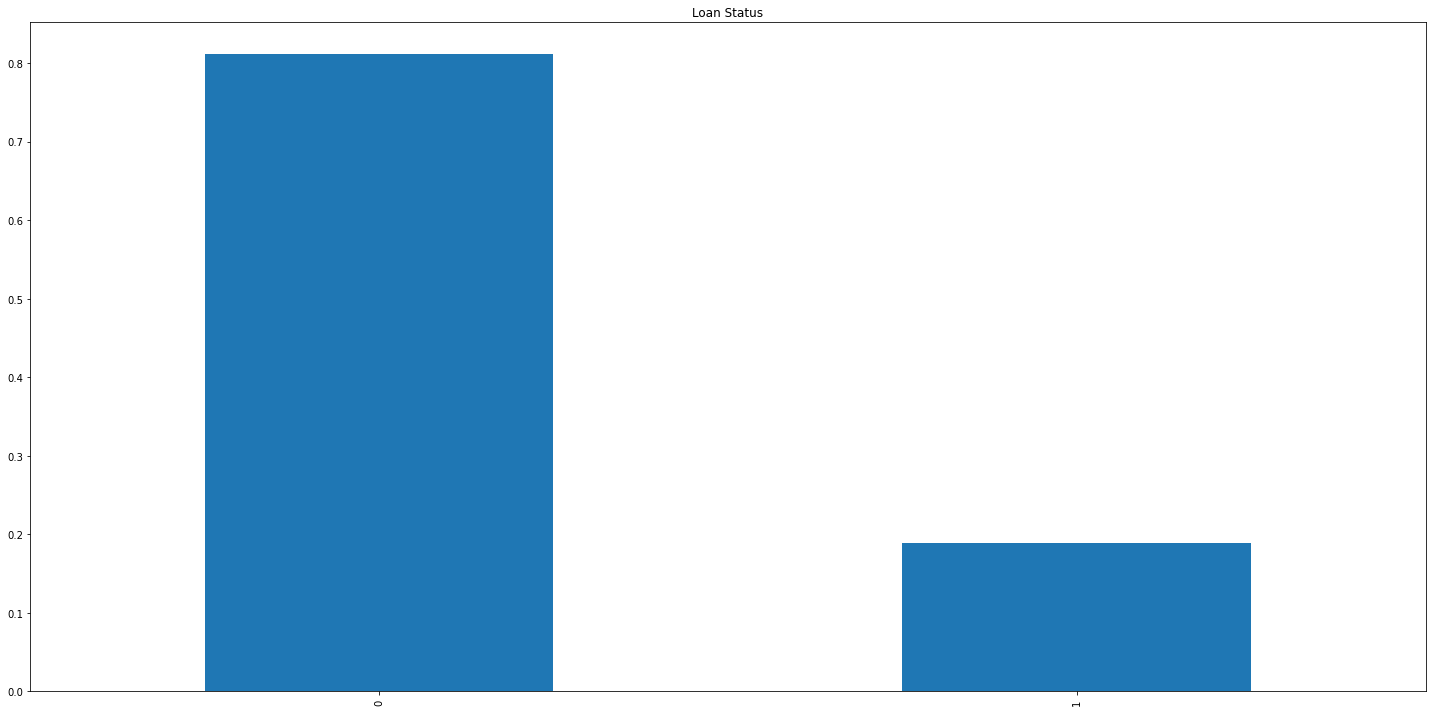

In [50]:
df_loan['Loan/No Loan'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Loan Status')
plt.show()

In [51]:
# Majority of the customers do not get approved for availing loans.Only 20% customers are availed with loans.

### Independent Variable (Categorical)

#### Home status

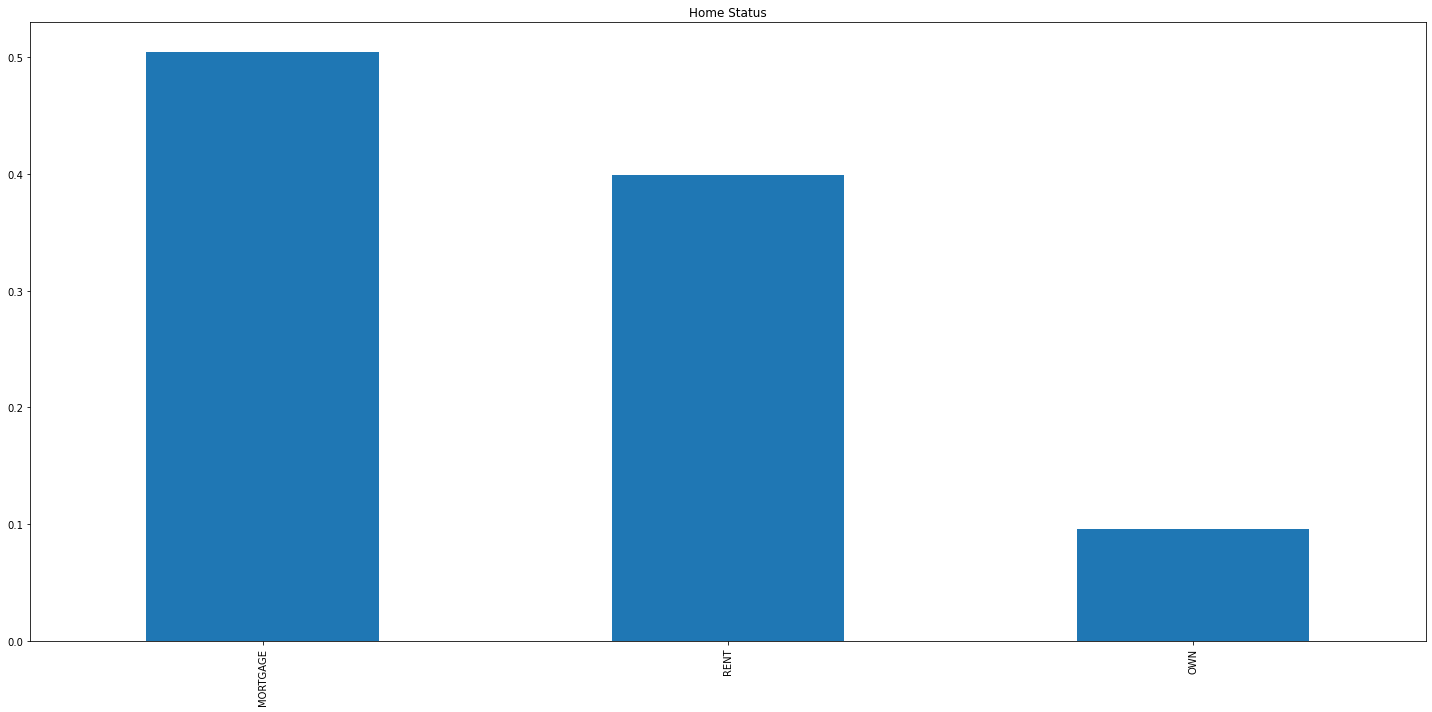

In [52]:
df_loan['Home Status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Home Status')
plt.show()

In [53]:
# 50% of the customers are having mortgage loans. 40% customers are on rent. Only few customers have their on home.
# Asset valuation will reduce for such customers with mortgage and rent.

#### GGGrade

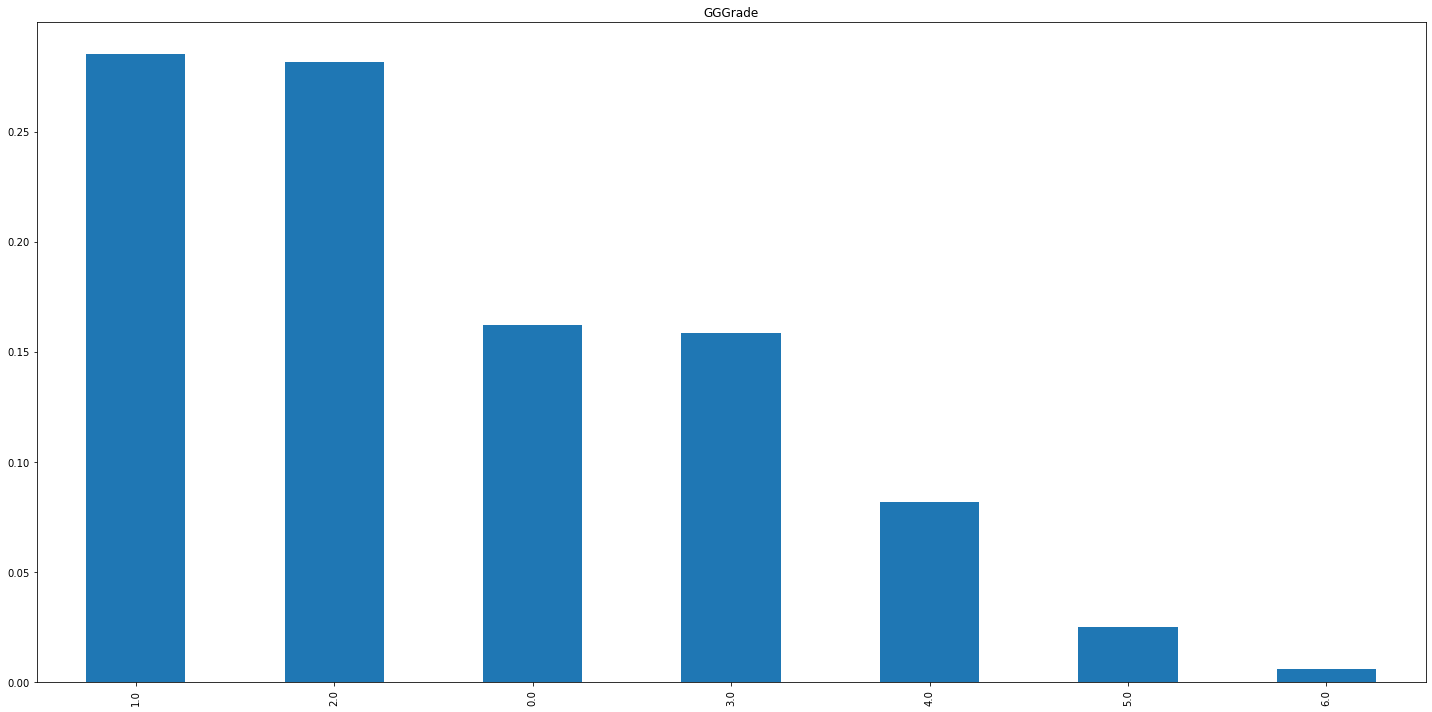

In [54]:
df_loan['GGGrade'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='GGGrade')
plt.show()

In [55]:
# GradeI and II customers are in more proportion compared with other grades.

#### Validation

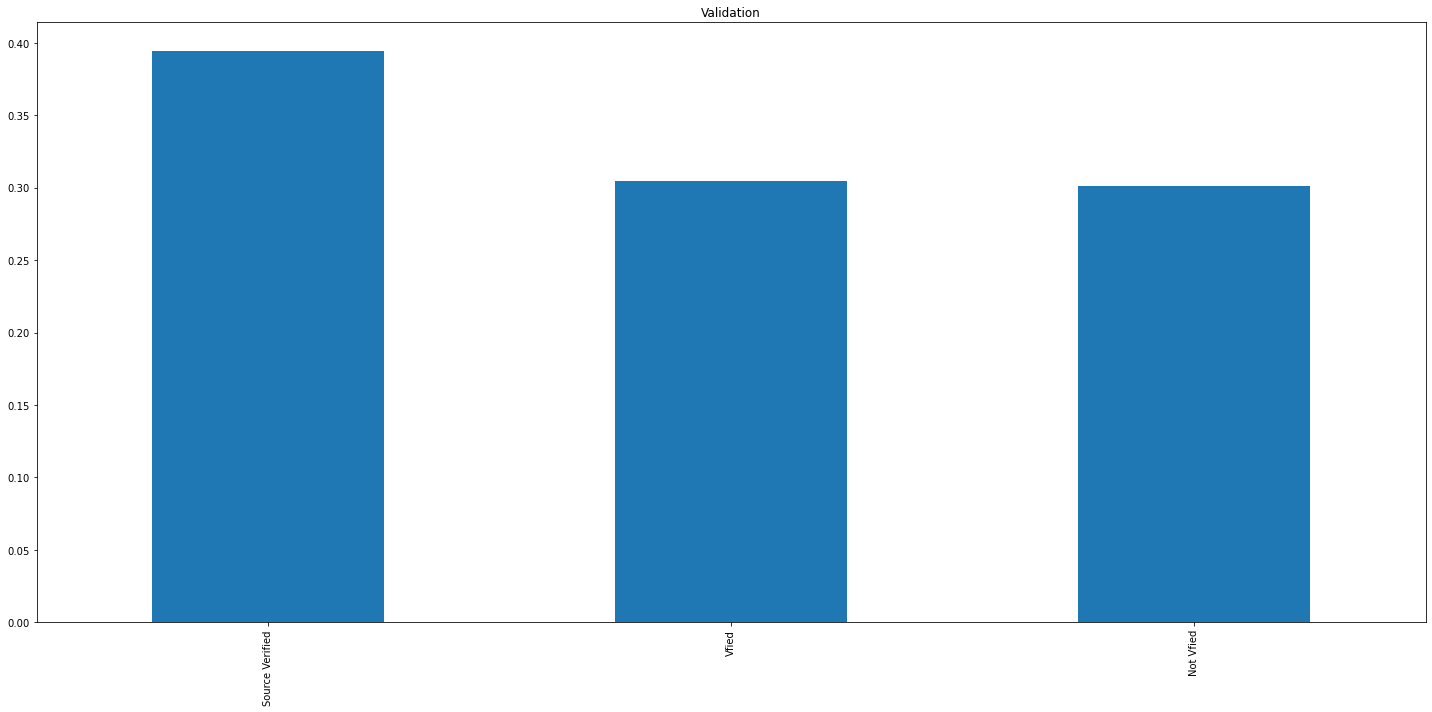

In [56]:
df_loan['Validation'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Validation')
plt.show()

In [57]:
# 40% customers have their source verified. Customers who are not verified and verfied are in same proportion.

#### Experience

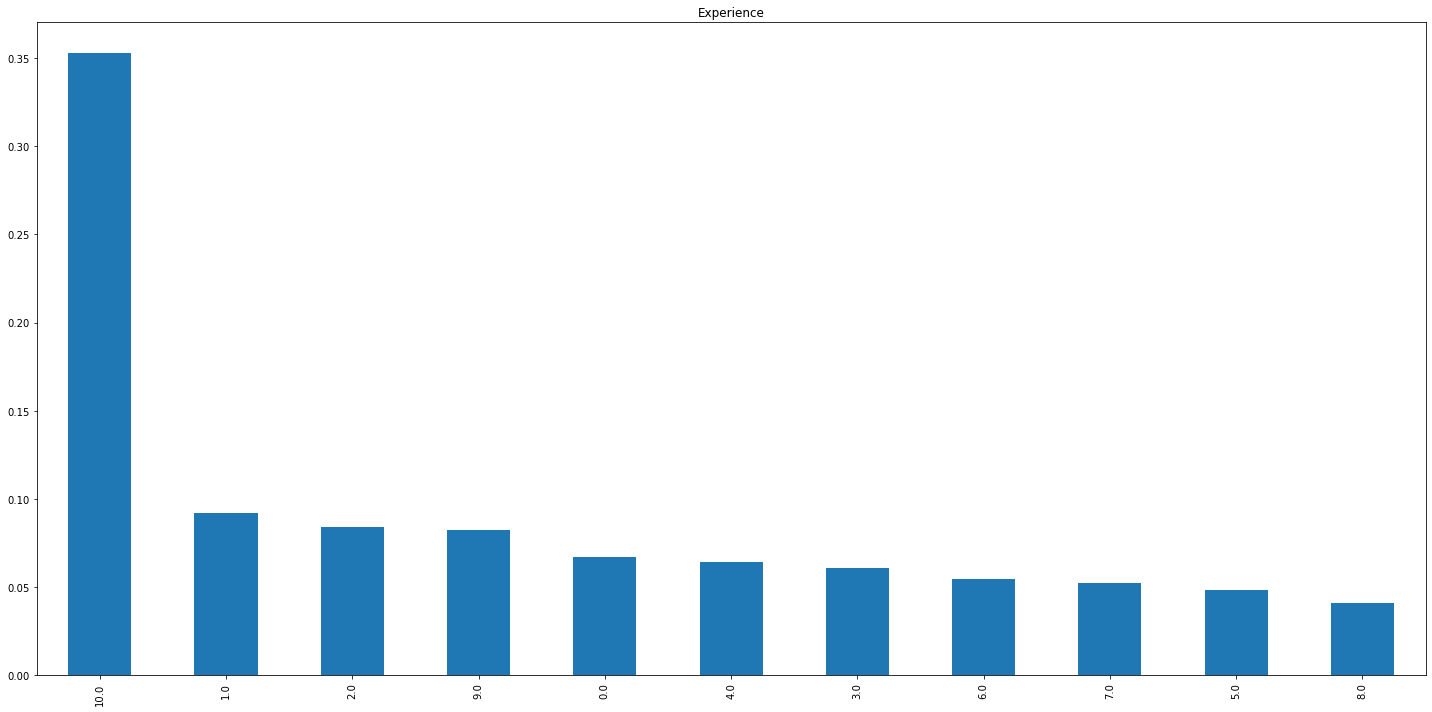

In [58]:
df_loan['Experience'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Experience')
plt.show()

In [59]:
# The Sample data of most customers have higher experiences.
# 10+ years customers who want to appply for loan are significantly higher than other groups.

#### File status

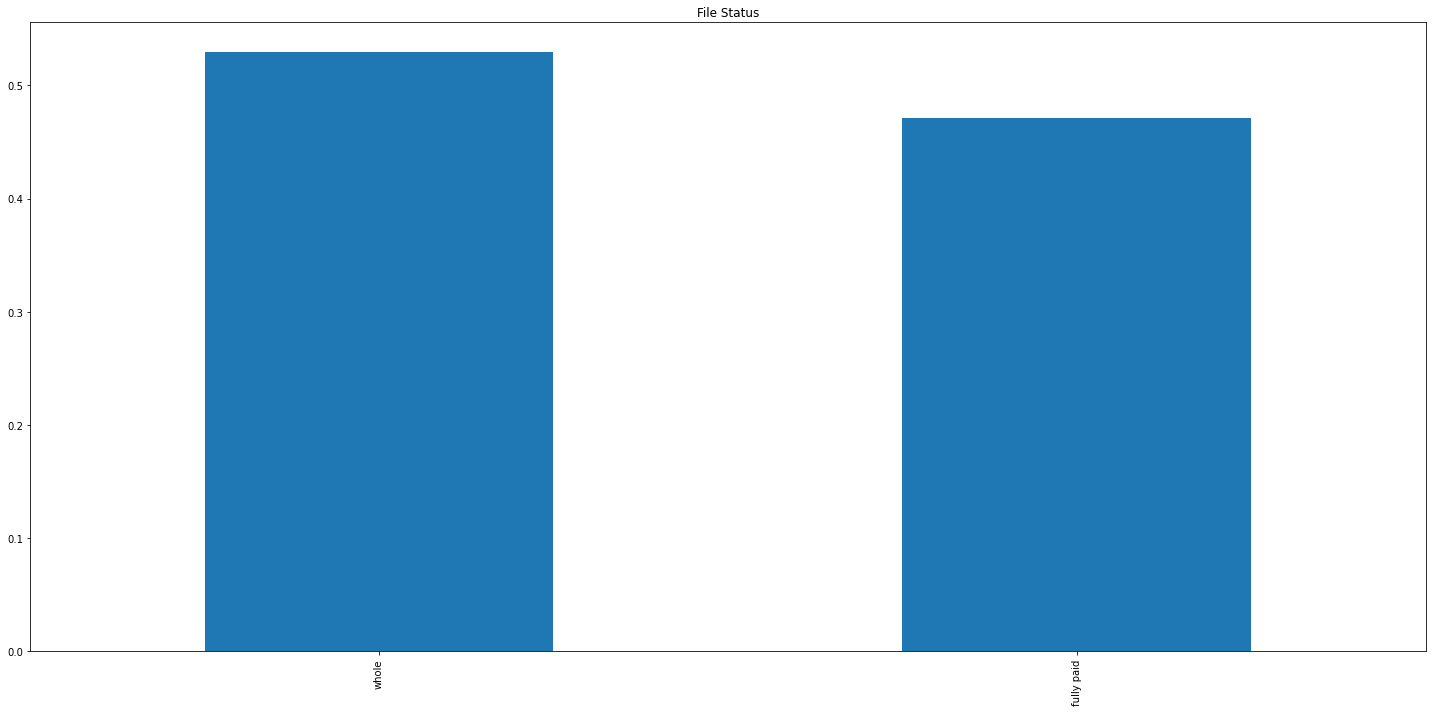

In [60]:
df_loan['File Status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='File Status')
plt.show()

#### Duration

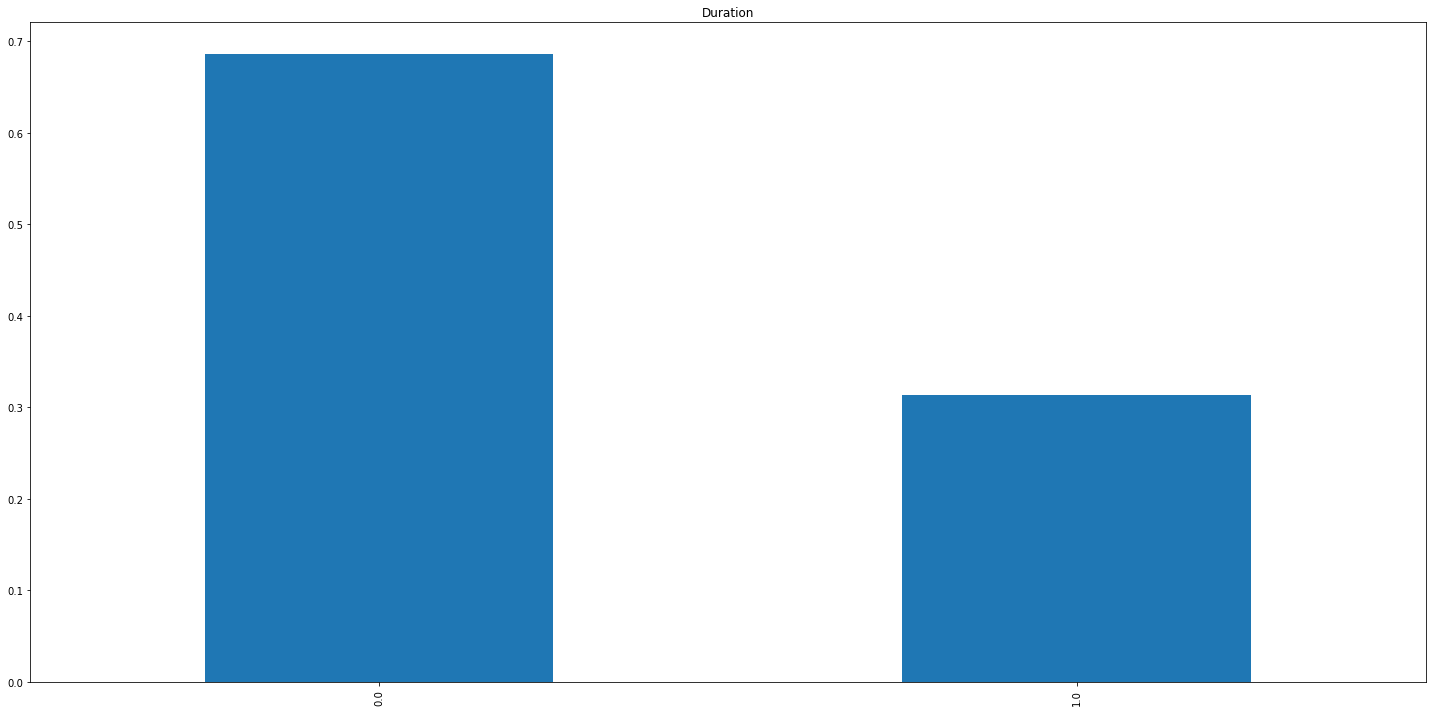

In [61]:
df_loan['Duration'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Duration')
plt.show()

In [62]:
# majority of customers want shorter loan duration i.e 3 years.

#### Reason

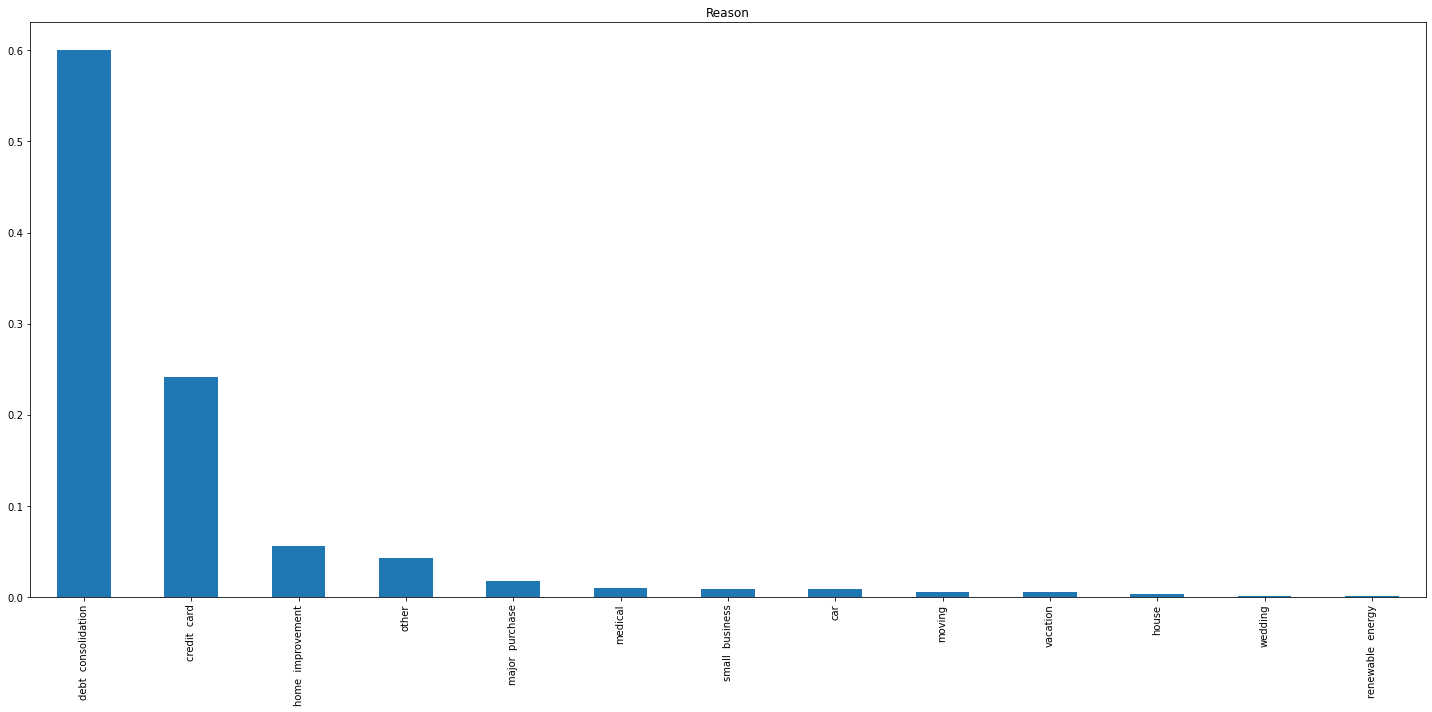

In [63]:
df_loan['Reason'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Reason')
plt.show()

In [64]:
# majority of the customers want to avail loans just to refinance as they might be having lower interests compared with other banks. 
# This is a significant boost to the business of this bank.

### Independent Variable (Numerical)

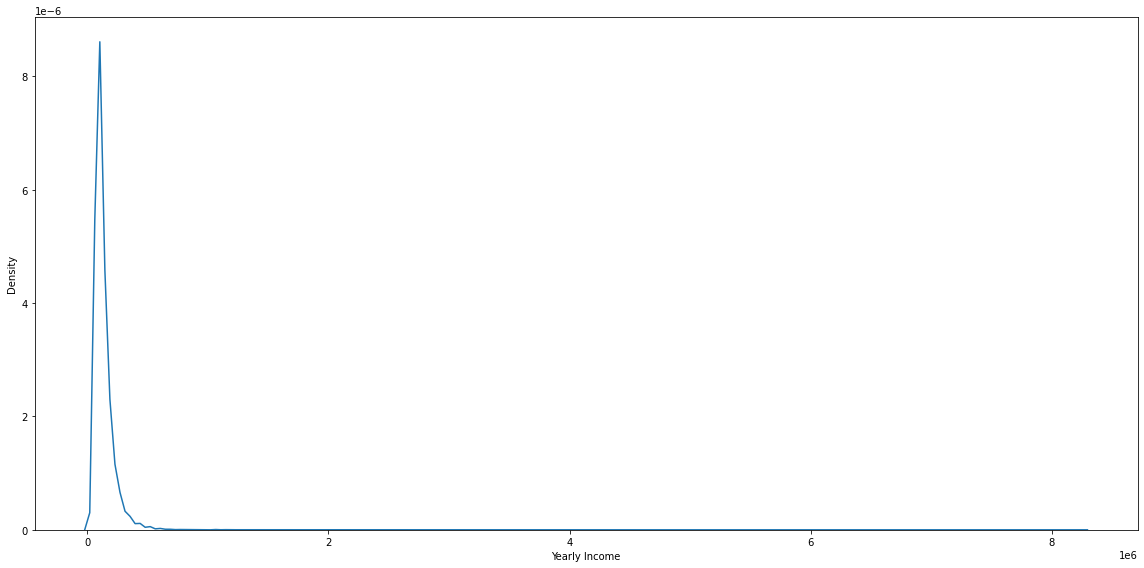

In [65]:
sns.kdeplot(df_loan['Yearly Income'])
plt.show()

In [66]:
# the distribution of annual income is not normal and is highly right skewed. 
# Linearity does not seem to exist with loan approval. 

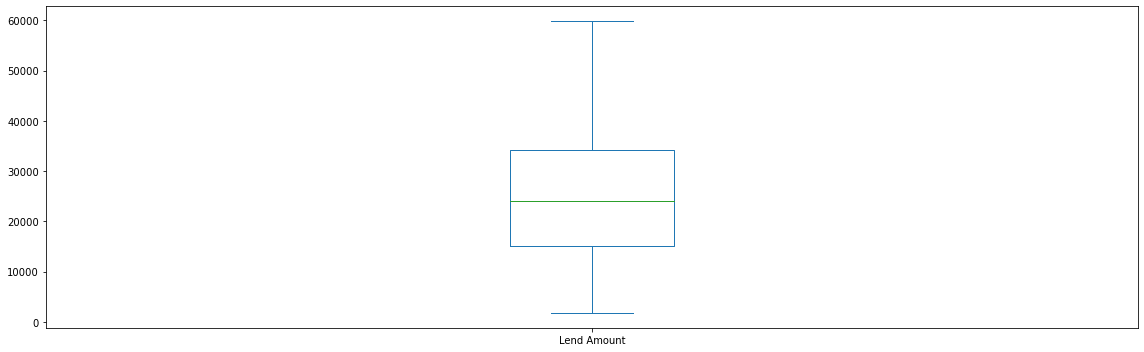

In [67]:
df_loan['Lend Amount'].plot.box(figsize=(16,5))
plt.show()

In [68]:
# Majority of the loan amount is around $ 24000

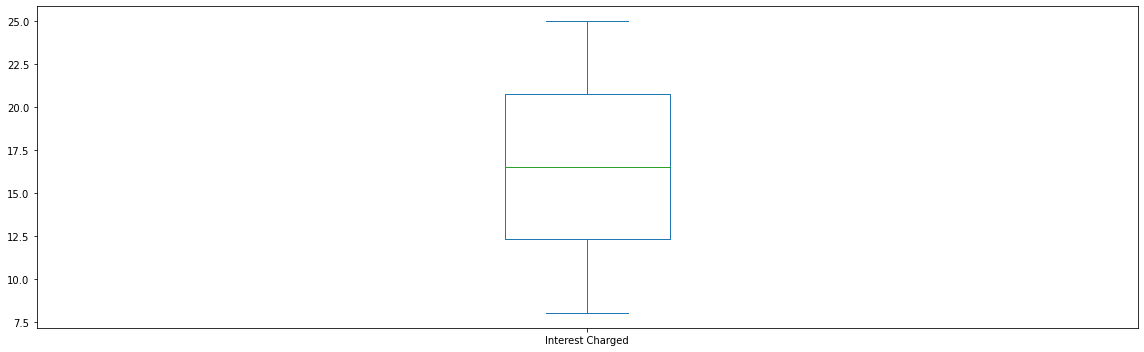

In [69]:
df_loan['Interest Charged'].plot.box(figsize=(16,5))
plt.show()

In [70]:
# the average interest charges is around 16.5%

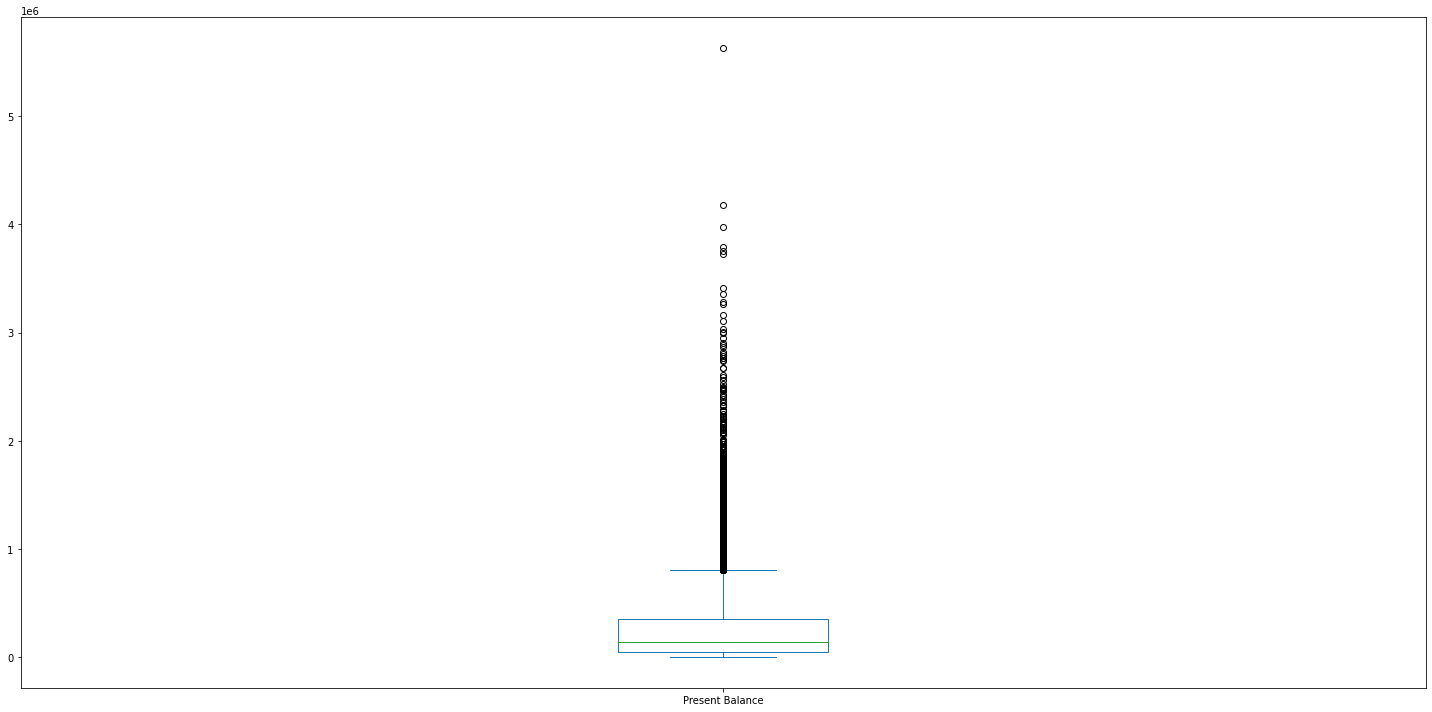

In [71]:
df_loan['Present Balance'].plot.box(figsize=(20,10))
plt.show()

In [72]:
# Most of the customers have balance in their account with less than 1000000.

# Modelling

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [182]:
#Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X=train_df
y=df_loan['Loan/No Loan']
model = LogisticRegression(random_state=42)
model.fit(X, y)

LogisticRegression(random_state=42)

In [ ]:
from sklearn import svm
model=svm.SVC()
model.fit(X, y)

In [435]:
from sklearn.tree import DecisionTreeClassifier
X=train_df
y=df_loan['Loan/No Loan']
model = DecisionTreeClassifier(random_state=42,max_depth=8)
model.fit(X, y)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [297]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
# pred_rf = random_forest.predict(X_test)

RandomForestClassifier(random_state=42)

In [140]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [565]:
model=GaussianNB(var_smoothing=0.00000001)
model.fit(X[k],y)

GaussianNB(var_smoothing=1e-08)

In [369]:
model = GradientBoostingClassifier(max_depth=6,random_state=42)
model.fit(X, y)

GradientBoostingClassifier(max_depth=6, random_state=42)

In [382]:
model=BaggingClassifier(n_estimators=50)
model.fit(X, y)

BaggingClassifier(n_estimators=50)

In [ ]:
model=AdaBoostClassifier(base_estimator=model,n_estimators=50,learning_rate=0.1,hidden_layer_sizes=100)
model.fit(X, y)

In [367]:
model = MLPClassifier(solver = 'adam', random_state = 42, max_iter = 1000)
model.fit(X, y)

MLPClassifier(max_iter=1000, random_state=42)

In [384]:
from sklearn.model_selection import GridSearchCV

In [386]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X, y)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.02310129700083159}

### Feature Selection

In [436]:
model.feature_importances_

array([1.47493337e-04, 0.00000000e+00, 2.30458339e-04, 0.00000000e+00,
       1.78986431e-03, 0.00000000e+00, 1.05692218e-03, 2.09507581e-04,
       4.12000258e-04, 4.20105563e-04, 0.00000000e+00, 6.47446305e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.26912826e-04,
       0.00000000e+00, 0.00000000e+00, 7.79233283e-01, 9.00825948e-03,
       5.33712133e-04, 0.00000000e+00, 7.74431954e-03, 3.24226218e-03,
       4.07922703e-04, 4.87336456e-03, 2.14803427e-02, 3.64505429e-03,
       9.62473191e-03, 9.65640183e-02, 2.45530277e-03, 2.93817841e-03,
       1.45803918e-03, 2.05712573e-03, 1.47687011e-03, 4.81165023e-02])

In [439]:
X.columns

Index(['Validation_Source Verified', 'Validation_Vfied', 'Home Status_OWN',
       'Home Status_RENT', 'File Status_whole', 'Reason_credit  card',
       'Reason_debt  consolidation', 'Reason_home  improvement',
       'Reason_house', 'Reason_major  purchase', 'Reason_medical',
       'Reason_moving', 'Reason_other', 'Reason_renewable  energy',
       'Reason_small  business', 'Reason_vacation', 'Reason_wedding',
       'Claim Type_J', 'Asst_Reg', 'Yearly Income', 'Unpaid 2 years',
       'Already Defaulted', 'Debt to Income', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Account Open', 'Due Fee',
       'Total Unpaid Amount', 'GGGrade', 'Experience', 'Duration'],
      dtype='object')

<BarContainer object of 36 artists>

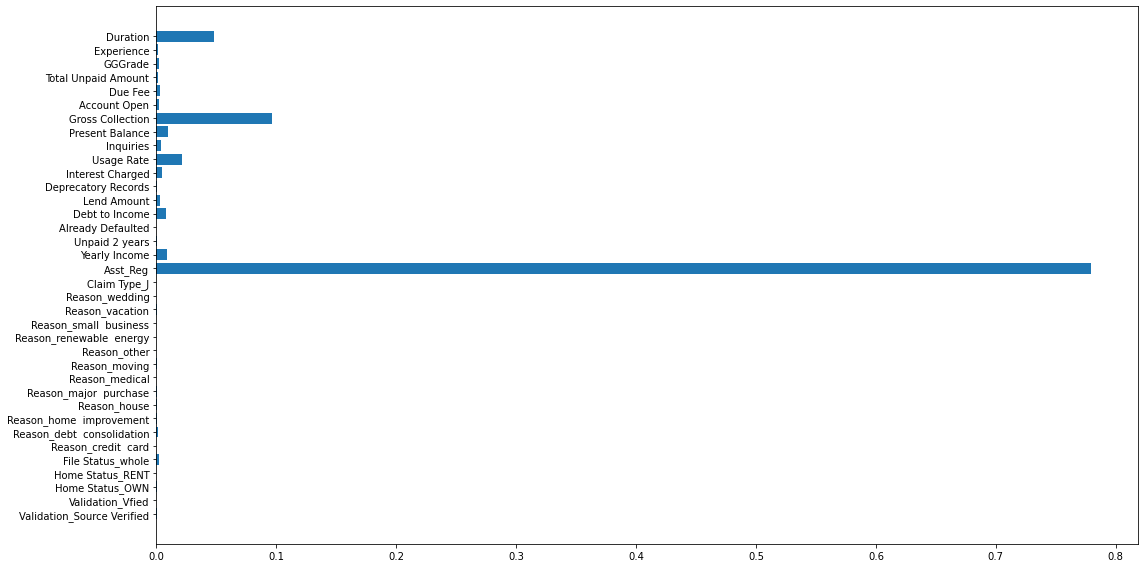

In [438]:
plt.barh(X.columns, model.feature_importances_)

In [75]:
# most relevant features after feature selection
k=['Gross Collection','Asst_Reg','Usage Rate','Duration']

In [76]:
X.columns

Index(['Validation_Source Verified', 'Validation_Vfied', 'Home Status_OWN',
       'Home Status_RENT', 'File Status_whole', 'Reason_credit  card',
       'Reason_debt  consolidation', 'Reason_home  improvement',
       'Reason_house', 'Reason_major  purchase', 'Reason_medical',
       'Reason_moving', 'Reason_other', 'Reason_renewable  energy',
       'Reason_small  business', 'Reason_vacation', 'Reason_wedding',
       'Claim Type_J', 'Asst_Reg', 'Yearly Income', 'Unpaid 2 years',
       'Already Defaulted', 'Debt to Income', 'Lend Amount',
       'Deprecatory Records', 'Interest Charged', 'Usage Rate', 'Inquiries',
       'Present Balance', 'Gross Collection', 'Account Open', 'Due Fee',
       'Total Unpaid Amount', 'GGGrade', 'Experience', 'Duration'],
      dtype='object')

# Model evaluation

## Best Model - Naive Bayes Classifier

In [77]:
model=GaussianNB(var_smoothing=0.00000001)
model.fit(X[k],y)

GaussianNB(var_smoothing=1e-08)

In [78]:
from sklearn.metrics import f1_score
f1_score(y,model.predict(X[k]))

0.5225894688853431

In [79]:
model.predict(test_df[k])

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [80]:
pred_cv = model.predict(test_df[k])
model.score(X[k],y)

0.76064

In [81]:
print(pred_cv.max())
print(pred_cv.min())

1
0


In [82]:
submit=pd.read_csv('Sample_Submission.csv')
sub=pd.DataFrame(pred_cv,columns=[ 'Loan/No Loan'],index=submit['ID'])
sub.to_csv('Submission.csv')